In [4]:
!pip3 install torch torchvision torchaudio

  Using cached torchvision-0.14.0-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached torchaudio-0.13.0-cp39-cp39-win_amd64.whl (2.1 MB)



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [6]:
!cd yolov5 & pip install -r requirements.txt

  Using cached GitPython-3.1.29-py3-none-any.whl (182 kB)


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 252.5/252.5 kB 2.6 MB/s eta 0:00:00
  Using cached PyYAML-6.0-cp39-cp39-win_amd64.whl (151 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3


In [7]:
# import library

#torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import torch

In [11]:
#deteksi foto

##load model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Hanif/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-28 Python-3.9.0 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 480x640 1 person
Speed: 28.6ms pre-process, 278.1ms inference, 12.0ms NMS per image at shape (1, 3, 480, 640)


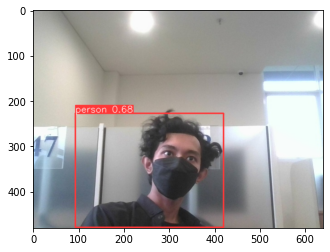

In [14]:
path = '../capture/ur_capture/'
awake = path + 'awake'
drowsy = path +'drowsy'

img = 'E:/Kuliah/Semester 5/Data Mining II/final-project-datmin2/hanif nafis/capture/ur_capture/awake/awake.608377a8-6baf-11ed-93f5-fc4482a2ef62.jpg'

results = model(img)
results.print()

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [1]:
import tensorflow
print(tensorflow.__version__)

2.11.0


In [1]:
import keras
print(keras.__version__)

2.8.0


In [3]:
import tensorboard
print(tensorboard.__version__)

2.8.0


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('labelled_normal.csv')
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.rename({'rectanglelabels':'label'}, axis=1, inplace=True)
df

,x,y,width,height,label
0,0.341102,0.861818,44.972826,56.702899,Drowsy
1,0.516949,0.803636,36.956522,57.246377,Drowsy
2,0.559322,0.938182,32.608696,53.079710,Drowsy
3,0.483051,0.381818,40.217391,66.123188,Drowsy
4,0.307203,0.090909,44.429348,74.637681,Drowsy
...,...,...,...,...,...
170,0.764831,0.774545,33.423913,59.239130,Awake
171,0.353814,0.556364,32.201087,67.391304,Awake
172,0.502119,0.440000,38.994565,74.818841,Awake
173,0.552966,0.232727,40.760870,73.731884,Awake


In [4]:
#Define X and y
x_data = df.drop(['label'], axis=1)
y_data = df

In [5]:
#Train Test Validation Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)


In [6]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dropout
## Create Model ##

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


## Compile Model ##
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#summary
model.summary()

AttributeError: module 'tensorflow.compat.v2.__internal__.tracking' has no attribute 'TrackableSaver'

In [ ]:
# #weight and annealer
# weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
#                                save_best_only=True, save_weights_only=True)
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [ ]:
# #callback
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [6]:
#fit model
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                #   class_weight=class_weight, #Jika imbalance, untuk balancing data
                  # callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
losses[['acc','val_acc']].plot()

In [ ]:
target_names = ["drowsy", "awake"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

In [25]:
#LSTM
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()
model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True,
                       input_shape=(5, 4,),
                       dropout=0.5))

model.add(Flatten())
# Dense is fully connected layer. 16 hidden units
# activation for lstm is basically sigmoid or tanh
model.add(Dense(216, activation='sigmoid')) #FC1
model.add(Dense(32, activation='tanh')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))#FC3
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))#Output Layer
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

#summary
model.summary()


ImportError: cannot import name 'to_categorical' from 'keras.utils' (c:\Users\Hanif\anaconda3\envs\tf\lib\site-packages\keras\utils\__init__.py)

In [ ]:
#weight and annealer
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [ ]:
#callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [1]:
import tensorflow
print(tensorflow.__version__)

2.11.0


In [ ]:
#fit model
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                #   class_weight=class_weight, #Jika imbalance, untuk balancing data
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val))

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
losses[['acc','val_acc']].plot()

In [ ]:
target_names = ["drowsy", "awake"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))